## TP : Analyse Spectrale

### 1. Puissance itérée et méthode de déflation

* **Principe**

La méthode de la puissance itérée consiste à calculer la suite :

$x_{k+1} = \frac{A_{x_{k}}}{||A_{x_{k}}||}$

qui va converger vers un vecteur propre associé à la valeur propre de plus grand module $\lambda_{1}$.

* **Fonctionnement**

*Méthode de la puissance itérée*

``1.`` Choisir un vecteur initial non nul $x_0$


``2.`` Calculer : $A \times x_{0}$


``3.`` Normalisation : $\frac{A_{x_{0}}}{||A_{x_{0}}||}$


``4.`` Calculer : $\frac{x^{T}Ax}{x^{T}x}$


``5.`` Répéter ``2 & 3`` jusqu'à ce que le vecteur obtenu converge vers $\lambda_{1}$


Pour trouver les autres valeurs propres :

*Méthode de déflation* 

``5.`` Calculer $v_{1} = Ax_{0} - (x_{0}.T \times Ax_{0}) \times x_{0}$

``6.`` Normalisation : $v_{1} = \frac{v_{1}}{||v_{1}||}$

``7.`` On applique à nouveau la méthode par puissance itérée en prenant ``v1`` comme vecteur initial.

In [333]:
# Implémentation PYTHON
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import math

A   = np.matrix([[3, 4, 0], [1, 3, 0], [0, 0, 2]])
eps = 1e-15
x0  = np.matrix([2, 1, 1]).T

print("A = ")
print(A)

A = 
[[3 4 0]
 [1 3 0]
 [0 0 2]]


``Q1.``

In [334]:
# Méthode de la puissance itérée
def iterpow(A, x0, eps):
    v_anc  = 0
    v_cour = 1
    y       = x0
    nb_iter = 0
 
    while (abs(v_cour - v_anc) > eps):
        nb_iter+=1
        v_anc = v_cour
        x = y/np.linalg.norm(y)
        y = A@x
        v_cour = (x.T*y)[0,0] / (x.T*x)[0,0]
        
    return v_cour, x, nb_iter

In [335]:
v1, eigen_vector, nb_iter = iterpow(A, x0, eps)
print("\n * Lambda 1 : ")
print(v1)
print("\n * Vecteur propre associé à lambda 1 :")
print(eigen_vector)
print("\n * Nombre d'itérations : ")
print(nb_iter)



 * Lambda 1 : 
5.0

 * Vecteur propre associé à lambda 1 :
[[8.94427191e-01]
 [4.47213595e-01]
 [4.91716548e-09]]

 * Nombre d'itérations : 
21


In [136]:
# Tests multiples

# Matrices
A1 = np.array([[4, -1], [2, 1]])
A2 = np.array([[0, 2, 3], [0, 5, 0], [0, 8, 0]])
A3 = np.array([[3, 1, 0], [1, 2, 1], [0, 1, 3]])

params = [(A1, np.matrix([1, 1]).T, eps),
          (A2, np.matrix([1, 1, 1]).T, eps),
          (A3, np.matrix([1, 1, 1]).T, eps)]


# Définir la fonction de test
def test_iterpow():
    for A, x0, eps in params:
        v_cour, eigen_vector, nb_iter = iterpow(A, x0, eps)
        print("Matrice de test :")
        print(A)
        print("Vecteur propre associé à la valeur propre {:.1f} :".format(v_cour))
        print(eigen_vector)
        print("Nombre d'itérations :", nb_iter)
        print()

In [137]:
# Exécuter la fonction de test
test_iterpow()

Matrice de test :
[[ 4 -1]
 [ 2  1]]
Vecteur propre associé à la valeur propre 3.0 :
[[0.70710678]
 [0.70710678]]
Nombre d'itérations : 2

Matrice de test :
[[0 2 3]
 [0 5 0]
 [0 8 0]]
Vecteur propre associé à la valeur propre 5.0 :
[[0.58473129]
 [0.42994948]
 [0.68791916]]
Nombre d'itérations : 4

Matrice de test :
[[3 1 0]
 [1 2 1]
 [0 1 3]]
Vecteur propre associé à la valeur propre 4.0 :
[[0.57735027]
 [0.57735027]
 [0.57735027]]
Nombre d'itérations : 2



``Q2.`` Trace de la vitesse de convergence de la méthode

In [138]:

def iterpow_trace(A, x0, eps):
    v_anc  = 0
    v_cour = 1
    y       = x0
    nb_iter = 0
    conv = []
 
    while (abs(v_cour - v_anc) > eps):
        nb_iter+=1
        v_anc = v_cour
        x = y/np.linalg.norm(y)
        y = A@x
        v_cour = (x.T*y)[0,0] / (x.T*x)[0,0]
        diff = abs(v_cour - v_anc)
        conv.append(diff)
 

    plt.plot(range(1, nb_iter+1), conv)
    plt.title('Vitesse de convergence')
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('log10')
    plt.show()
    
    return v_cour, x, nb_iter


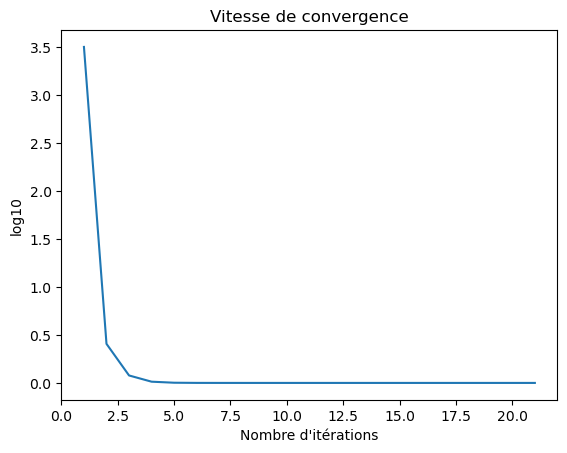

(5.0,
 matrix([[8.94427191e-01],
         [4.47213595e-01],
         [4.91716548e-09]]),
 21)

In [139]:
iterpow_trace(A, x0, eps)

``Q3.`` ``Méthode de déflation``

In [140]:

def deflation(A, x0, eps):
    n = A.shape[0] 
    eigvals = []
    eigvect = []

    for i in range(n):
        v, x, nb_iter = iterpow(A, x0, eps)
        eigvals.append(v)
        eigvect.append(x)
        
        A = A - v*((x@x.T)/(x.T@x))
        
    return eigvals, eigvect


In [172]:
deflation(A, x0, eps)

([-9.000000000000002, 1.0000000000000002],
 [matrix([[-0.31622777],
          [ 0.9486833 ]]),
  matrix([[0.9486833 ],
          [0.31622777]])])

In [180]:

# Test 1
A1 = np.matrix([[0, 3], [3, -8]])
x0 = np.matrix([1, 1]).T
eps = 1e-15

eigval, eigvect = deflation(A1, x0, eps)
print("\nValeurs propres attendues : [-9 1] / Valeurs propres trouvées : \n", eigval)

# Test 2
A2 = np.matrix([[2, 0, 1], [0, 2, 0], [1, 0, 2]])
x2 = np.matrix([2, 1, 1]).T
eps = 1e-15
eigval, eigvect = deflation(A2, x2, eps)
print("\nValeurs propres attendues : [3 2 1] / Valeurs propres trouvées : \n", eigval)

# Test 3
A3 = np.matrix([[2, 1, 1], [1, 2, 1], [1, 1, 2]])
x3 = np.matrix([4, 1, 1]).T
eps = 1e-15
eigval, eigvect = deflation(A3, x3, eps)
print("\nValeurs propres attendues : [4 1 1] / Valeurs propres trouvées : \n", eigval)



Valeurs propres attendues : [-9 1] / Valeurs propres trouvées : 
 [-9.000000000000002, 1.0000000000000002]

Valeurs propres attendues : [3 2 1] / Valeurs propres trouvées : 
 [2.9999999999999996, 2.0000000000000004, 1.0000000000000002]

Valeurs propres attendues : [4 1 1] / Valeurs propres trouvées : 
 [4.0, 0.9999999999999997, 0.9999999999999999]


## 2. PageRank de Google

``Q1.``

La matrice d'adjacence G est définie comme suit : 

* $G_{i,j} = 1$ si sur la page $j$ il y a un lien vers la page $i$

* $G_{i,j} = 0$ sinon.

In [413]:
# Lecture du fichier "webgraph.dat"

def read(filename):
    with open(filename, 'r') as f:
        lines = [line.strip().split() for line in f.readlines()]
    f.close()
    
    # Matrice d'adjacence
    G = np.zeros((500, 500)).T
    
    for l in lines:
        i, j     = int(l[0]) - 1, int(l[1]) - 1
        G[i][j]  = 1
    
    return G

In [415]:
G = read('webgraph.dat')
print(G)


[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


``Q2.``

Le paramètre $d$ est choisi entre 0 et 1.

In [417]:
def transition_probabiliste(G, d):
    n = np.shape(G)[0]
    A = np.zeros((n, n))

    for j in range(n):
        # Nombre de liens sortants de la page j
        lj = np.count_nonzero(G[j,:])

        # Si la page j n'a pas de lien sortant, la probabilité est uniforme
        if lj == 0:
            A[:,j] = 1/n
            
        # Sinon, calculer la probabilité en fonction des liens sortants
        else:
            for i in range(n):
                if G[j,i] == 1:
                    A[i,j] = (1-d)*G[j,i]/lj + d/n
                else:
                    A[i,j] = d/n
                    
    return np.matrix(A)

In [560]:
AP = transition_probabiliste(G, 0.7)
print(AP)

[[0.0014     0.002      0.0134     ... 0.02015    0.02015    0.0214    ]
 [0.01251111 0.002      0.0134     ... 0.02015    0.02015    0.0214    ]
 [0.01251111 0.002      0.0014     ... 0.02015    0.02015    0.0214    ]
 ...
 [0.0014     0.002      0.0014     ... 0.0014     0.02015    0.0014    ]
 [0.0014     0.002      0.0014     ... 0.02015    0.0014     0.0014    ]
 [0.0014     0.002      0.0014     ... 0.0014     0.0014     0.0014    ]]


In [568]:
# Définir la popularité des pages

x0 = np.matrix(np.ones(500)).T
v1, p, nb_iter = iterpow(AP, x0, 1e-15)

#print(p)
print("* Valeur propre de + grand module : ", v1)
print("* Vecteur propre associé : ", p)


* Valeur propre de + grand module :  1.0000000000000016
* Vecteur propre associé :  [[0.30562565]
 [0.22818583]
 [0.22548007]
 [0.2203882 ]
 [0.22497194]
 [0.22304705]
 [0.21849069]
 [0.22444508]
 [0.2257669 ]
 [0.21815448]
 [0.22303878]
 [0.22548007]
 [0.2237116 ]
 [0.02395848]
 [0.02395848]
 [0.04046114]
 [0.0372182 ]
 [0.03642111]
 [0.03352808]
 [0.02763815]
 [0.03086721]
 [0.02724123]
 [0.02687388]
 [0.02841357]
 [0.02873542]
 [0.03912886]
 [0.03460629]
 [0.21850653]
 [0.02820847]
 [0.02836455]
 [0.02870492]
 [0.02870492]
 [0.02816293]
 [0.02816293]
 [0.02816293]
 [0.02837749]
 [0.02816293]
 [0.02437059]
 [0.02649578]
 [0.02779902]
 [0.0274411 ]
 [0.02702506]
 [0.0273433 ]
 [0.02862842]
 [0.02448387]
 [0.02800163]
 [0.02807768]
 [0.02815736]
 [0.02815736]
 [0.02815736]
 [0.02815736]
 [0.02815736]
 [0.02815736]
 [0.02680936]
 [0.02541418]
 [0.02043335]
 [0.02043335]
 [0.02117738]
 [0.02117738]
 [0.02117738]
 [0.02043335]
 [0.02043335]
 [0.02114843]
 [0.02114843]
 [0.02114843]
 [0.02

``Pour déterminer les pages les plus populaires, nous trions les éléments de p par ordre décroissant.``

In [562]:
# Tri décroissant sur p 
popularity = np.argsort(p, axis=0)[::-1]

# Affichage des 20 pages les + populaires
for i in range(20):
    page_index = popularity_indices[i, 0] + 1
    print(page_index)


1
2
9
3
12
5
8
13
6
11
4
28
7
10
295
350
16
26
17
18


``Q4.``


In [580]:
def system_eigenval(A):
    b = np.linalg.solve(A - np.eye(500), np.zeros(500))
    return b

In [582]:
res = system_eigenval(AP)

In [584]:
# Mesure du temps d'exécution
import time

In [587]:
# np.linalg.solve()
start = time.perf_counter()
for i in range(1000):
    system_eigenval(AP)
end = time.perf_counter()
print("Temps d'exécution : ", end - start, " secondes")

NameError: name 'end_time' is not defined

In [589]:
start = time.perf_counter()
for i in range(1000):
    p = system_eigenval(AP)
    # Tri décroissant sur p 
    popularity = np.argsort(p, axis=0)[::-1]

    # Affichage des 20 pages les + populaires
    for i in range(20):
        page_index = popularity_indices[i, 0] + 1
        #print(page_index)
    
end = time.perf_counter()
print("Temps d'exécution : ", end - start, " secondes")

Temps d'exécution :  6.349535899998955  secondes


In [591]:
start = time.perf_counter()
x0 = np.matrix(np.ones(500)).T
for i in range(1000):
    AP = transition_probabiliste(G, 0.7)

    _, p, _ = iterpow(AP, x0, 1e-15)

    # Tri décroissant sur p 
    popularity = np.argsort(p, axis=0)[::-1]

    # Affichage des 20 pages les + populaires
    for i in range(20):
        page_index = popularity_indices[i, 0] + 1
        #print(page_index)
    
end = time.perf_counter()
print("Temps d'exécution : ", end - start, " secondes")

Temps d'exécution :  189.4170320000012  secondes
